In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import holidays
import logging


In [32]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info("Imports successfully completed and logging is set up.")



2024-11-15 11:01:31,047 - INFO - Imports successfully completed and logging is set up.


In [33]:
# Load data
data_path = r'C:\Users\hayyu.ragea\AppData\Local\Programs\Python\Python312\Rossmann_Sales_Forecasting_Project\data\synthetic_sales_data.csv'
df = pd.read_csv(data_path)


In [34]:
# Convert 'Date' to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

In [35]:
logging.info("Dataset loaded successfully.")

2024-11-15 11:01:34,703 - INFO - Dataset loaded successfully.


In [36]:
# Add holiday flag
us_holidays = holidays.US()
df['is_holiday'] = df.index.to_series().apply(lambda date: 1 if date in us_holidays else 0)


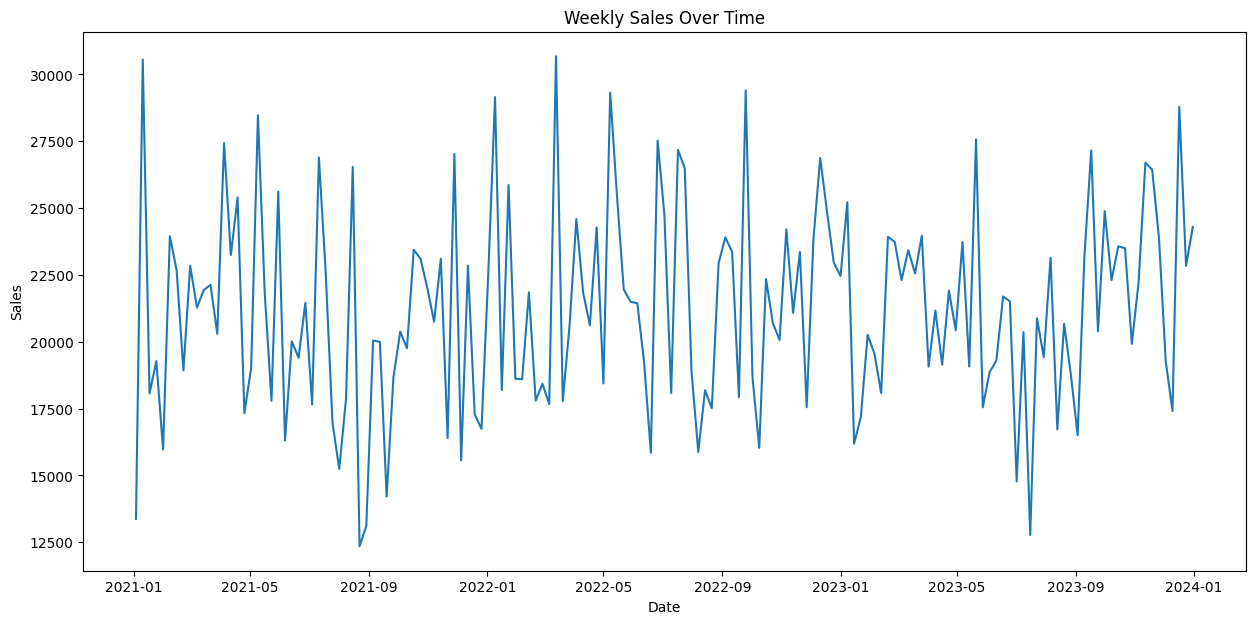

In [37]:
# 1. Weekly Sales Over Time
weekly_sales = df['Sales'].resample('W').sum()
plt.figure(figsize=(15, 7))
plt.plot(weekly_sales.index, weekly_sales)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

C:\Users\hayyu.ragea\AppData\Local\Temp\ipykernel_10736\231598921.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


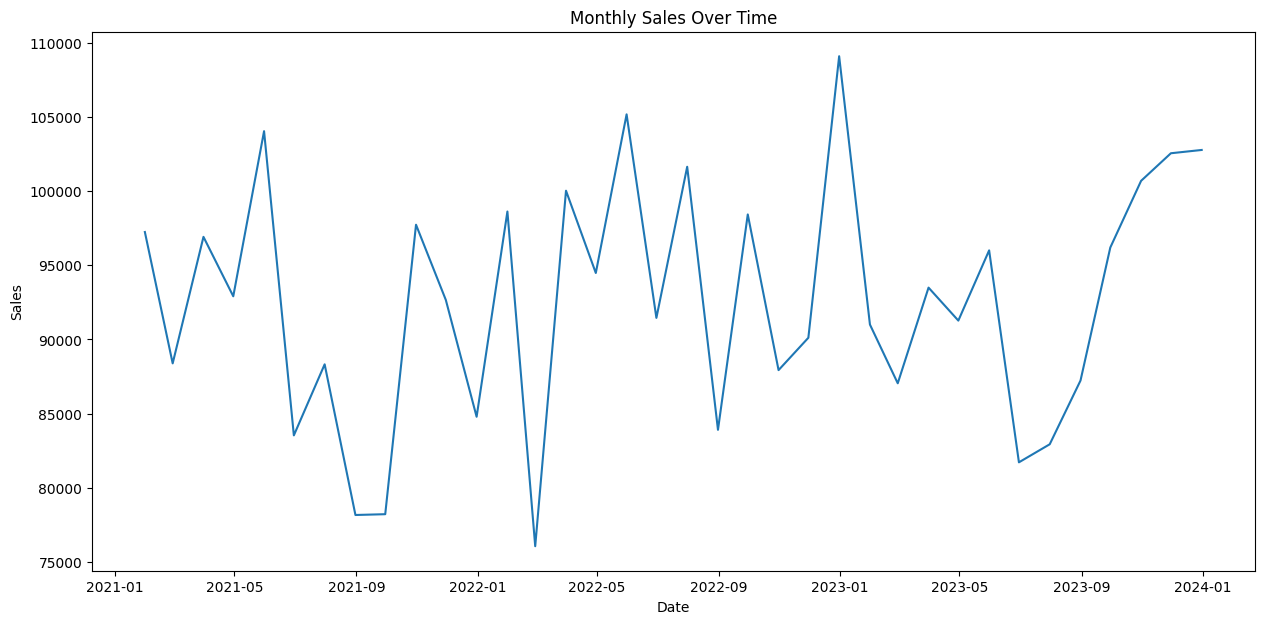

In [38]:
# 2. Monthly Sales Over Time
monthly_sales = df['Sales'].resample('M').sum()
plt.figure(figsize=(15, 7))
plt.plot(monthly_sales.index, monthly_sales)
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


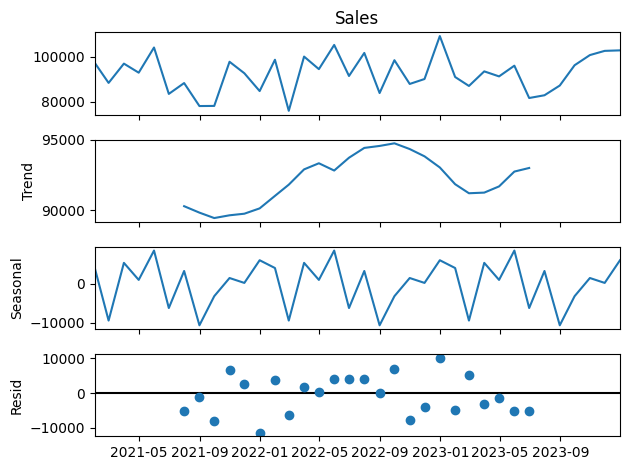

In [39]:

# 3. Seasonal Sales Decomposition (monthly data)
result = seasonal_decompose(monthly_sales, model='additive', period=12)
result.plot()
plt.tight_layout()
plt.show()

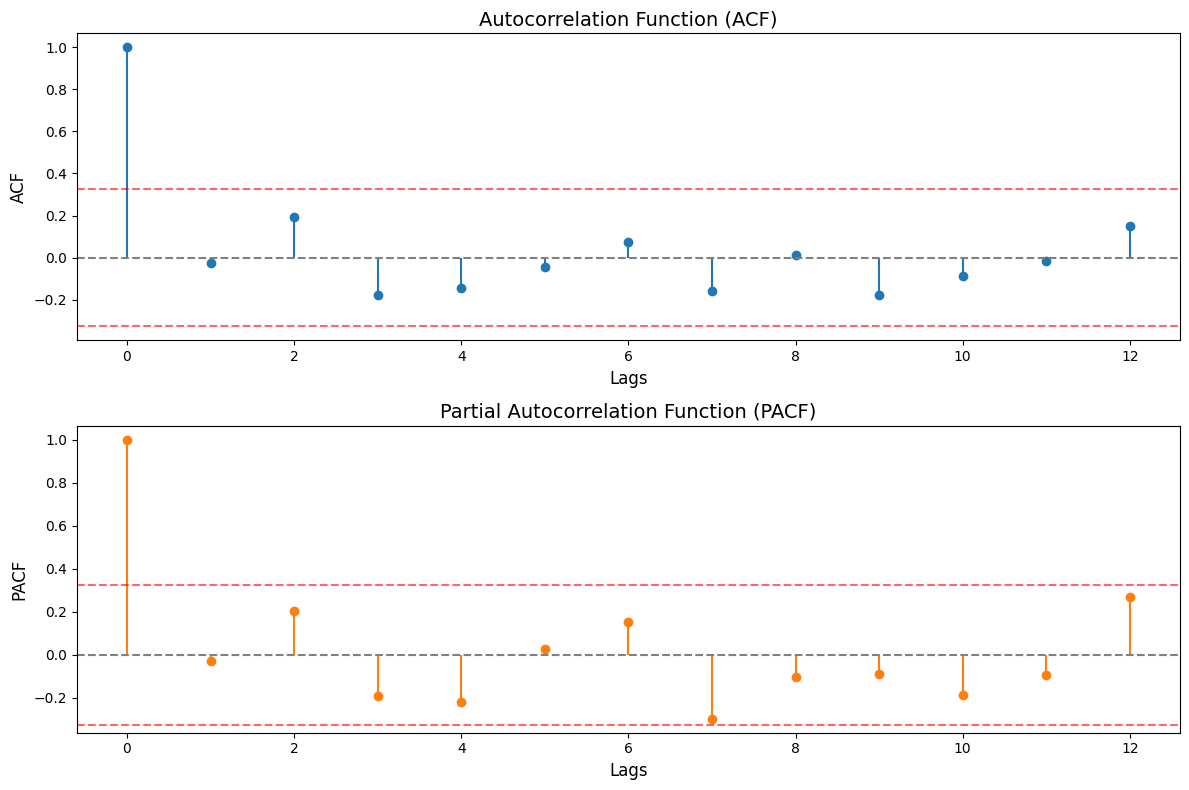

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# 4. Autocorrelation and Partial Autocorrelation
n_lags = len(monthly_sales) // 3
acf_values = acf(monthly_sales.dropna(), nlags=n_lags)
pacf_values = pacf(monthly_sales.dropna(), nlags=n_lags)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.stem(range(len(acf_values)), acf_values, basefmt=" ", linefmt="C0-", markerfmt="C0o")
ax1.axhline(y=0, linestyle='--', color='gray')
ax1.axhline(y=-1.96/np.sqrt(len(monthly_sales)), linestyle='--', color='red', alpha=0.6)
ax1.axhline(y=1.96/np.sqrt(len(monthly_sales)), linestyle='--', color='red', alpha=0.6)
ax1.set_title('Autocorrelation Function (ACF)', fontsize=14)
ax1.set_xlabel('Lags', fontsize=12)
ax1.set_ylabel('ACF', fontsize=12)

ax2.stem(range(len(pacf_values)), pacf_values, basefmt=" ", linefmt="C1-", markerfmt="C1o")
ax2.axhline(y=0, linestyle='--', color='gray')
ax2.axhline(y=-1.96/np.sqrt(len(monthly_sales)), linestyle='--', color='red', alpha=0.6)
ax2.axhline(y=1.96/np.sqrt(len(monthly_sales)), linestyle='--', color='red', alpha=0.6)
ax2.set_title('Partial Autocorrelation Function (PACF)', fontsize=14)
ax2.set_xlabel('Lags', fontsize=12)
ax2.set_ylabel('PACF', fontsize=12)

plt.tight_layout()
plt.show()


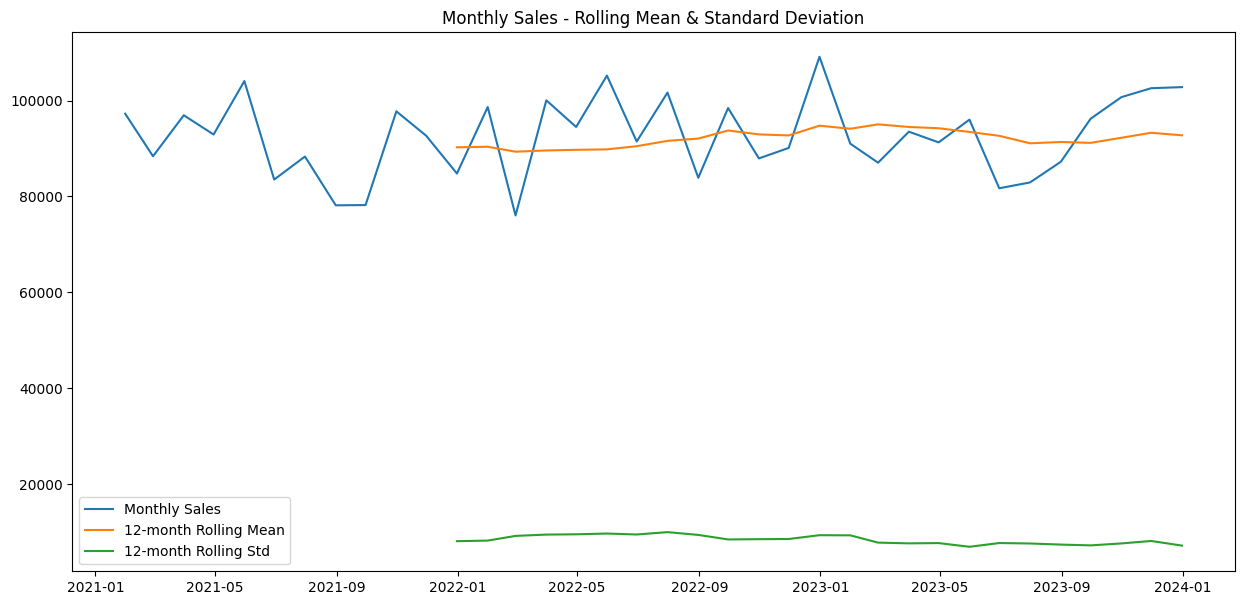

In [41]:
# 5. Rolling statistics (12-month mean & std)
rolling_mean = monthly_sales.rolling(window=12).mean()
rolling_std = monthly_sales.rolling(window=12).std()

plt.figure(figsize=(15, 7))
plt.plot(monthly_sales.index, monthly_sales, label='Monthly Sales')
plt.plot(rolling_mean.index, rolling_mean, label='12-month Rolling Mean')
plt.plot(rolling_std.index, rolling_std, label='12-month Rolling Std')
plt.legend()
plt.title('Monthly Sales - Rolling Mean & Standard Deviation')
plt.show()

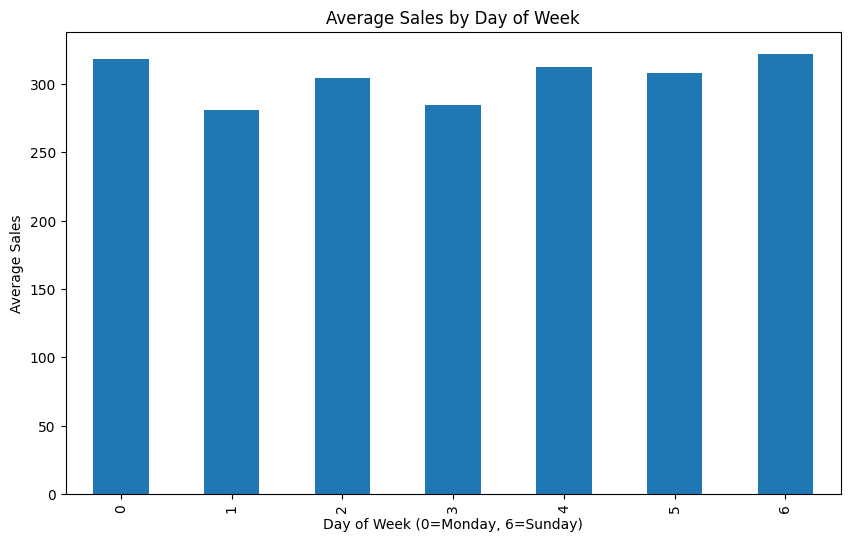

In [42]:
# 6. Day of Week Sales Patterns
df['DayOfWeek'] = df.index.dayofweek
day_of_week_sales = df.groupby('DayOfWeek')['Sales'].mean()
day_of_week_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Sales')
plt.show()


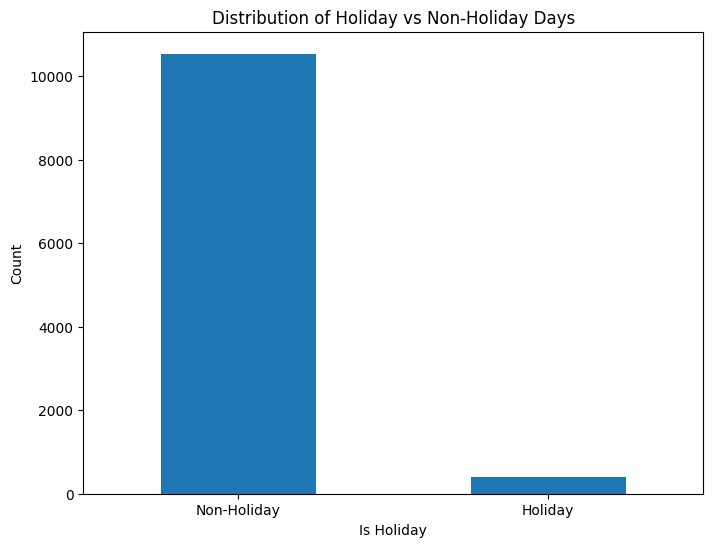

In [43]:

# 7. Holiday Distribution
plt.figure(figsize=(8, 6))
df['is_holiday'].value_counts().plot(kind='bar')
plt.title('Distribution of Holiday vs Non-Holiday Days')
plt.xlabel('Is Holiday')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

2024-11-15 11:02:11,592 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-15 11:02:11,845 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


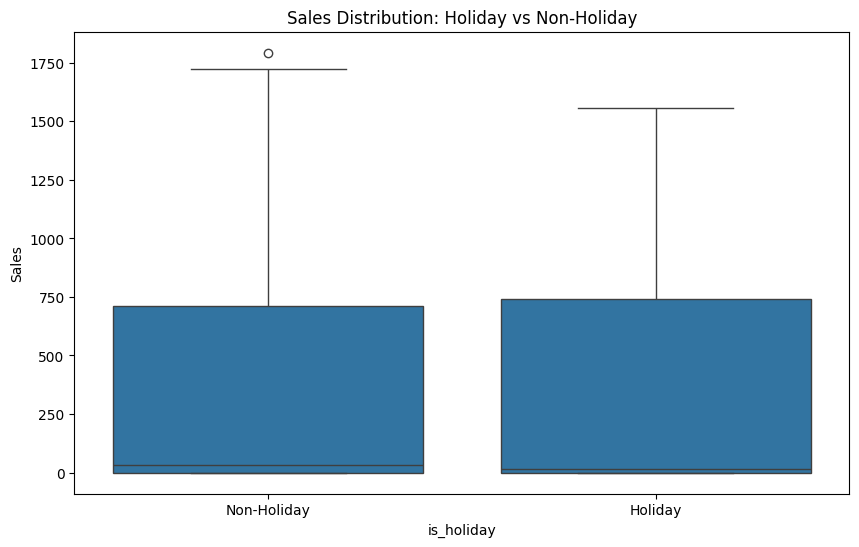

In [44]:
# 8. Sales Distribution: Holiday vs Non-Holiday
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_holiday', y='Sales', data=df)
plt.title('Sales Distribution: Holiday vs Non-Holiday')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()


In [45]:

# 9. Print summary statistics for sales by DayOfWeek and Holiday status
logging.info("Summary statistics by DayOfWeek:")
print(df.groupby('DayOfWeek')['Sales'].describe())
logging.info("Holiday vs Non-Holiday Sales:")
print(df.groupby('is_holiday')['Sales'].describe())

2024-11-15 11:02:14,804 - INFO - Summary statistics by DayOfWeek:
2024-11-15 11:02:15,649 - INFO - Holiday vs Non-Holiday Sales:


            count        mean         std  min  25%   50%     75%     max
DayOfWeek                                                                
0          1560.0  318.338462  469.388808  0.0  0.0  34.0  770.50  1639.0
1          1560.0  280.810256  443.543271  0.0  0.0  30.5  291.00  1691.0
2          1560.0  304.339744  462.794149  0.0  0.0  28.0  725.00  1603.0
3          1560.0  284.910897  454.747902  0.0  0.0  23.5  322.25  1793.0
4          1570.0  312.052229  465.506055  0.0  0.0  37.5  742.00  1621.0
5          1570.0  307.989172  469.064582  0.0  0.0  37.5  705.75  1721.0
6          1570.0  321.981529  466.041927  0.0  0.0  43.0  790.00  1697.0
              count        mean         std  min  25%   50%     75%     max
is_holiday                                                                 
0           10540.0  304.158824  461.256830  0.0  0.0  34.0  713.25  1793.0
1             410.0  309.865854  475.748371  0.0  0.0  16.5  742.25  1557.0


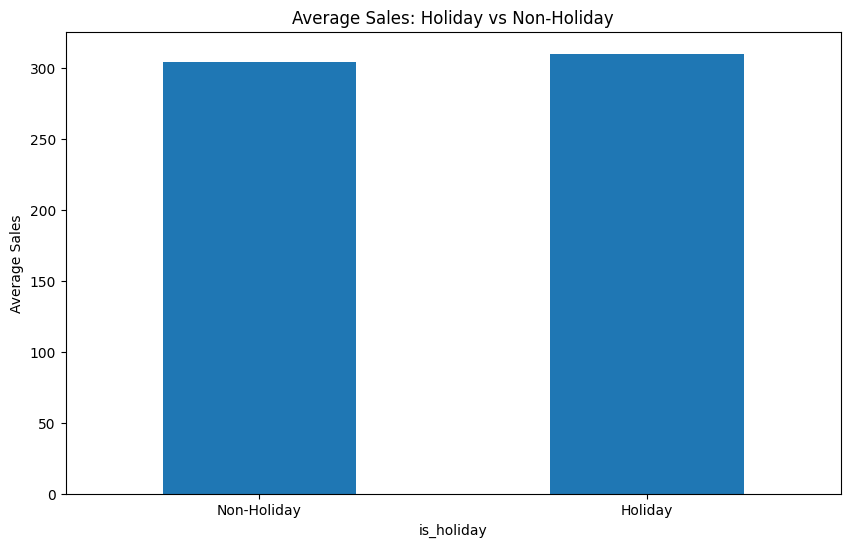

In [46]:
# 10. Average Sales: Holiday vs Non-Holiday
holiday_effect = df.groupby('is_holiday')['Sales'].mean()
holiday_effect.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sales: Holiday vs Non-Holiday')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

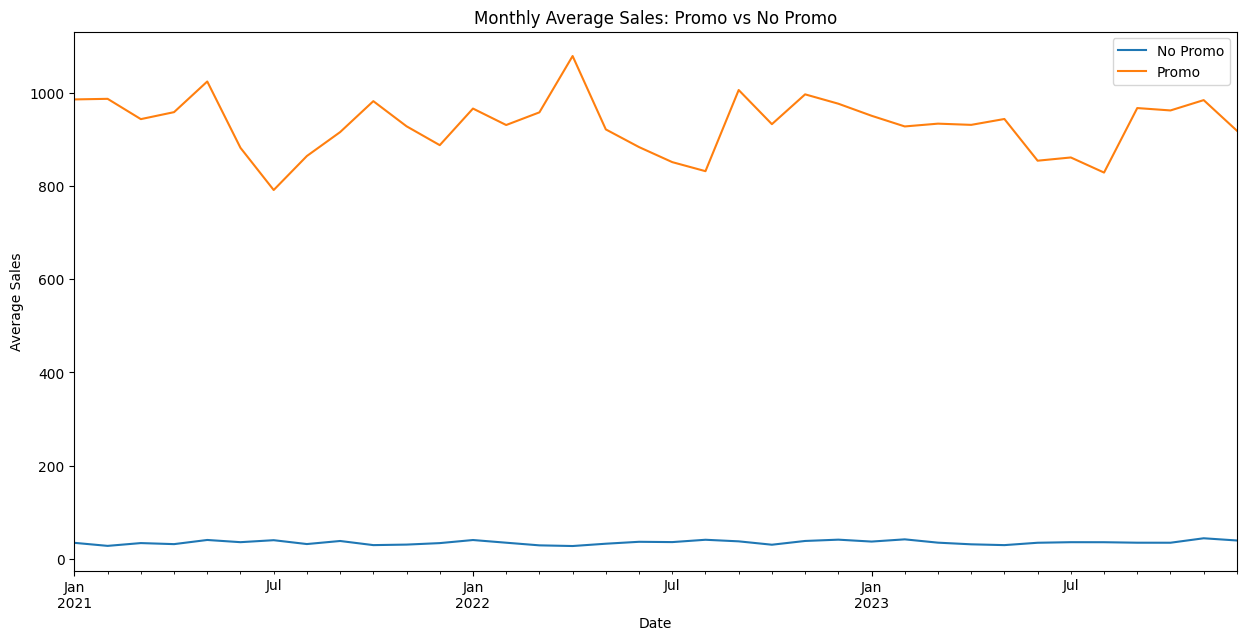

In [47]:
# 11. Promo Effect on Sales
monthly_promo_sales = df.groupby([df.index.to_period('M'), 'Promo'])['Sales'].mean().unstack()
monthly_promo_sales.columns = ['No Promo', 'Promo']

monthly_promo_sales['Difference'] = monthly_promo_sales['Promo'] - monthly_promo_sales['No Promo']
monthly_promo_sales['Percentage Increase'] = (monthly_promo_sales['Difference'] / monthly_promo_sales['No Promo']) * 100

monthly_promo_sales[['No Promo', 'Promo']].plot(figsize=(15, 7))
plt.title('Monthly Average Sales: Promo vs No Promo')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend(['No Promo', 'Promo'])
plt.show()


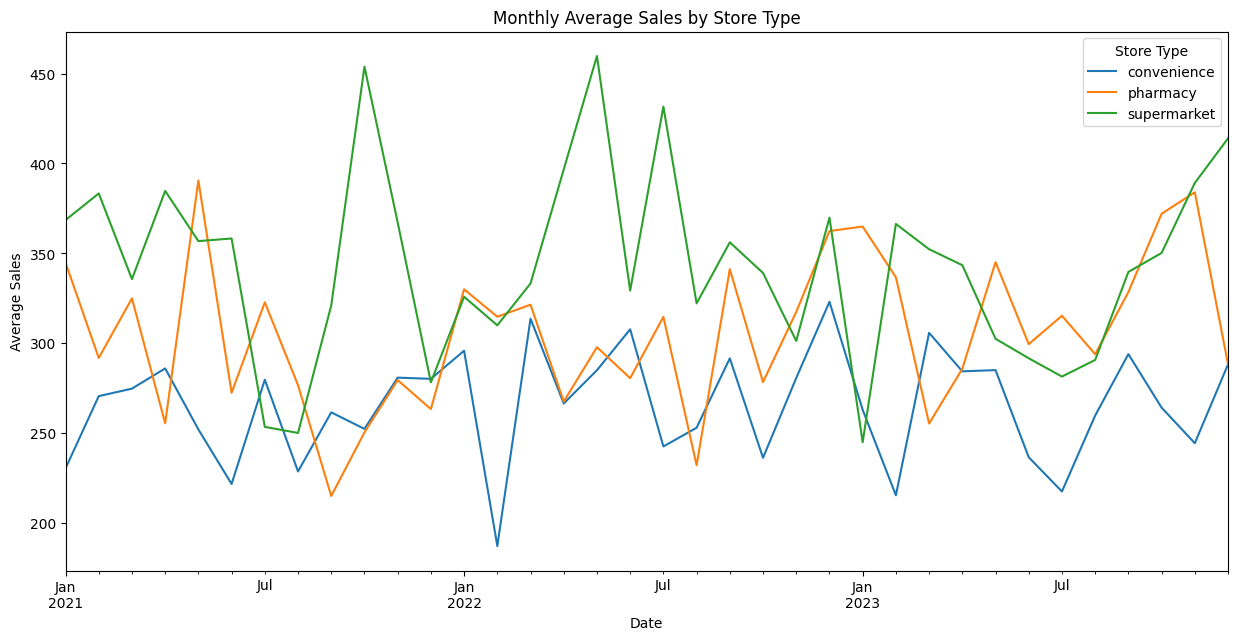

In [48]:
# 12. Store Type Sales Performance Over Time
store_type_sales = df.groupby([df.index.to_period('M'), 'Store_Type'])['Sales'].mean().unstack()
store_type_sales.plot(figsize=(15, 7))
plt.title('Monthly Average Sales by Store Type')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend(title='Store Type')
plt.show()


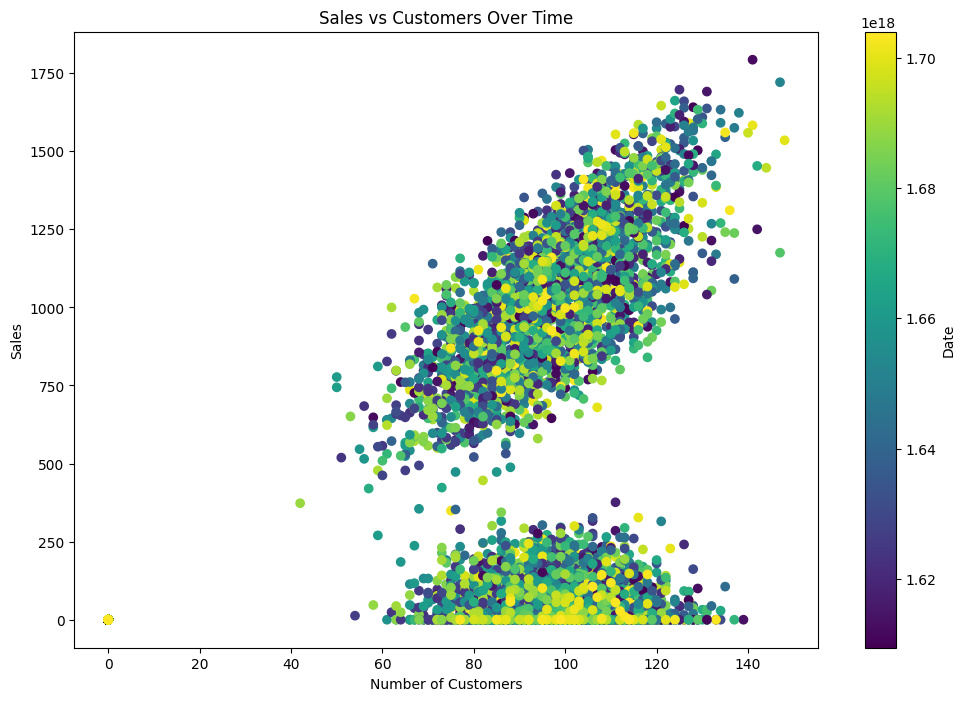

In [49]:
# 13. Scatter plot: Sales vs Customers over time
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Customers'], df['Sales'], c=df.index, cmap='viridis')
plt.colorbar(scatter, label='Date')
plt.title('Sales vs Customers Over Time')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()


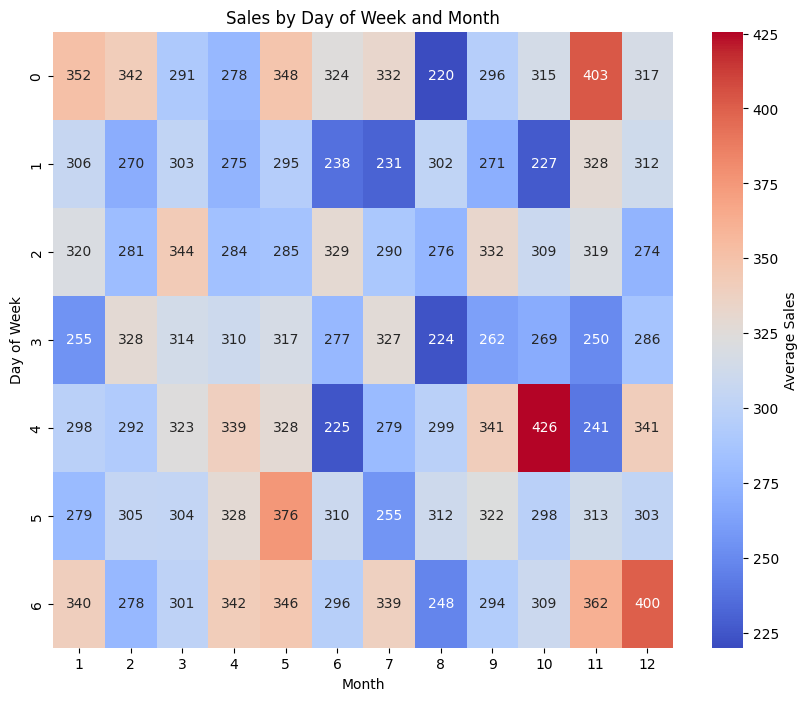

In [50]:
# 14. Heatmap of Sales by Day of Week and Month
df['Month'] = df.index.month
sales_heatmap = df.pivot_table(values='Sales', index='DayOfWeek', columns='Month', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(sales_heatmap, annot=True, fmt='.0f', cmap='coolwarm', cbar_kws={'label': 'Average Sales'})
plt.title('Sales by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.show()

In [52]:


# Summary of Output Insights

# Weekly Sales Over Time: The plot of weekly sales over time shows fluctuations, which can help in identifying trends, seasonal patterns, or abrupt changes in sales during specific weeks.

# Monthly Sales Over Time: The monthly sales trend provides a broader view of sales performance, helping to identify patterns, cyclical effects, and any irregularities or outliers.

# Seasonal Sales Decomposition: The decomposition reveals three components of monthly sales:
#   Trend: Long-term growth or decline.
#   Seasonal: Regular fluctuations within a year, suggesting potential seasonal patterns.
#   Residual: Noise or irregularities that aren't captured by the trend or seasonal components.

# Autocorrelation (ACF) and Partial Autocorrelation (PACF):
#   ACF shows the correlation of the time series with its past values, indicating if past values influence current values.
#   PACF indicates direct correlation without indirect correlations (i.e., controlling for intermediate lags). Peaks in these plots can help in identifying time-series models for forecasting.

# Rolling Statistics:
#   The 12-month rolling mean provides insights into the long-term trend.
#   The rolling standard deviation helps identify periods of high or low volatility in sales over time.

# Day of Week Sales Patterns: The bar plot highlights variations in sales by weekday, showing that certain days may consistently perform better than others, which could inform staffing, promotions, or marketing strategies.

# Holiday Distribution: The bar plot shows the count of holiday versus non-holiday days, helping to understand the frequency of holidays in the dataset.

# Sales Distribution: Holiday vs Non-Holiday: The box plot illustrates how sales distributions differ between holidays and non-holidays, potentially highlighting the influence of holidays on sales patterns.

# Summary Statistics for Sales by Day of Week and Holiday Status:
#   The summary statistics give a numerical overview of sales performance on different days and during holidays, which may point to periods when promotions or special events could be most effective.

# Average Sales: Holiday vs Non-Holiday: The bar plot compares average sales between holiday and non-holiday days, showing whether holidays lead to higher sales.

# Promo Effect on Sales: The plot and summary statistics provide insights into how promotions influence sales. Promotions result in a noticeable increase in sales, confirming their effectiveness.

# Store Type Sales Performance Over Time: The plot of sales by store type over time helps identify if certain store types outperform others, which could inform strategic decisions about store expansion or marketing efforts.

# Sales vs Customers: The scatter plot shows the relationship between the number of customers and sales, potentially highlighting whether higher foot traffic leads to increased sales.

# Sales by Day of Week and Month (Heatmap): The heatmap illustrates sales patterns across both days of the week and months, revealing potential seasonal and weekly cycles, and helping identify the best times for sales or promotions.

# Overall, the analysis provides valuable insights into sales behavior, trends, seasonality, and the impact of holidays and promotions. These insights can guide decision-making, forecasting, and marketing strategies for the business.

